In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling
import numpy as np
import imageio
from tqdm import tqdm_notebook as tqdm
import multiprocessing

In [2]:
TEST_VIDEO = '../../data/train/test.mp4'

In [3]:
def get_reader(path, frame_rate=1, size=None):
    total=0
    for i, frame in enumerate(imageio.get_reader(path).iter_data()):
        if i % frame_rate == 0:
            total += 1
            yield frame
        if size is not None and total == size:
            break

In [4]:
def get_total_len(path, frame_rate=1):
    return imageio.get_reader(path).get_meta_data()['nframes'] // frame_rate

In [5]:
SHAPE_VIDEO = next(get_reader(TEST_VIDEO)).shape

In [6]:
colors = np.zeros(SHAPE_VIDEO + (25,))
colors.shape

(120, 240, 3, 25)

In [13]:
FRAME_RATE = 100

In [14]:
for frame in tqdm(get_reader(TEST_VIDEO, FRAME_RATE),
                  total=get_total_len(TEST_VIDEO, FRAME_RATE)):
    frame = frame // 11
    for i in range(colors.shape[0]):
        for j in range(colors.shape[1]):
            for k in range(colors.shape[2]):
                colors[i, j, k, frame[i, j, k]] += 1

A Jupyter Widget

KeyboardInterrupt: 

In [71]:
frames_count = colors[0, 0, 0].sum()
ui_mask = np.zeros(colors.shape[:2])
for i in range(colors.shape[0]):
    for j in range(colors.shape[1]):
        for k in range(colors.shape[2]):
            color = colors[i, j, k] / frames_count
            ind = np.argsort(-color)
            max_sum = color[ind[:4]].sum()
            if max_sum > 0.7:
                ui_mask[i, j] += 255 / 3 * (max_sum ** 2)
ui_mask.sum()

297068.70557933766

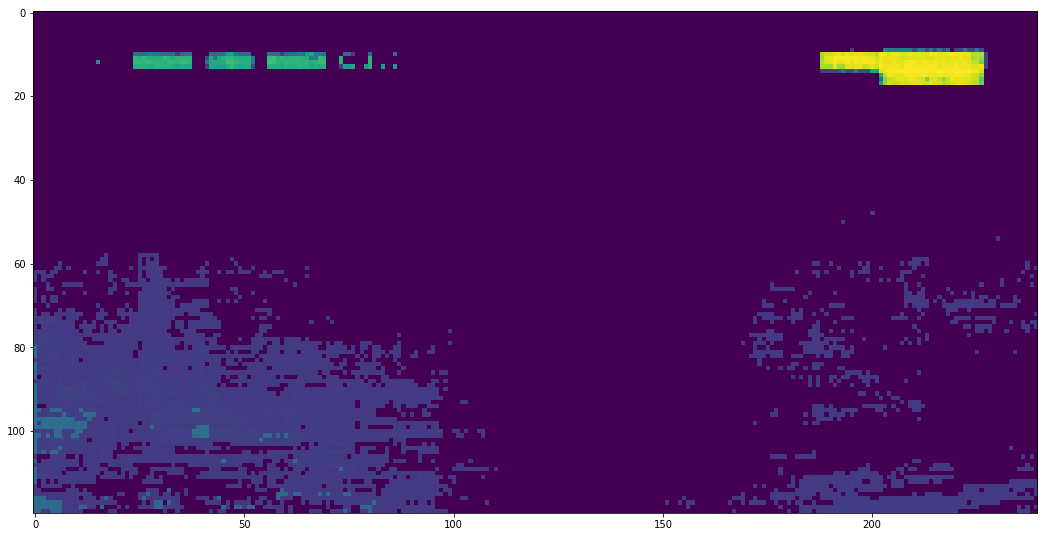

In [72]:
fig, ax = plt.subplots(figsize=(18, 20))
ax.imshow(ui_mask, interpolation='nearest')

In [73]:
    [1, 2, 3, 4][1:-1]

[2, 3]